In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplot2tikz

In [2]:
data = pd.read_csv('../log/20250521_ms_2.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])
data['variant'] = 'std'

data2 = pd.read_csv('../log/20250522.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])
data2['variant'] = 'only_inflate'
 
data2 = data2[data2['generation'] <= 1000]

data3 = pd.read_csv('../log/20250523_nopretrain.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])
data3['variant'] = 'no_pretrain'

data4 = pd.read_csv('../log/20250523_hpretrain.csv', names = ['dataset', 'train_fitness', 'test_fitness', 'parameters',
                                                        'depth', 'width', 'seed', 'generation', 'timing'])
data4['variant'] = 'h_pretrain'

data = pd.concat((data, data2, data3, data4))
data.reset_index(drop = True, inplace = True)

In [3]:
data.head()

,dataset,train_fitness,test_fitness,parameters,depth,width,seed,generation,timing,variant
0,bioav,32.627193,36.258366,1146,1,4,5,0,305.242281,std
1,bioav,32.627193,36.258366,1146,1,4,5,1,0.065056,std
2,bioav,32.390675,34.005520,783,2,4,5,2,0.051694,std
3,bioav,32.390675,34.005520,783,2,4,5,3,0.060445,std
4,bioav,32.224144,33.589134,1057,3,4,5,4,0.048921,std


In [4]:
baseline_final = pd.read_csv('../log/baseline_20250526.csv', names = ['dataset',  'test_fitness', 'seed','epoch', 'timing'])

In [5]:
baseline_evo =  pd.read_csv('../log/baseline_evo_20250526.csv', names = ['dataset', 'train_fitness', 'val_fitness', 'test_fitness', 'seed','epoch', 'timing'])
baseline_evo.dropna(axis = 0, inplace = True)

In [6]:
colors = ['#FF0000', '#0000FF', '#008000', '#800080']
light_colors = ['#F08080', '#87CEFA', '#90EE90', '#DDA0DD']

In [7]:
variants = data.variant.unique()
datas = data.dataset.unique()

In [8]:
baseline_final.head()

,dataset,test_fitness,seed,epoch,timing
0,bioav,68.954971,8,1000,663.274803
1,bioav,30.779556,9,1000,665.926589
2,bioav,28.992313,6,1000,668.576831
3,bioav,28.697771,2,1000,684.833575
4,bioav,67.865662,5,1000,687.051019


In [9]:
limits = {'bioav' : (10,40), 'ld50' : (1750, 2550), 'concrete_strength' : (4, 18), 'airfoil' : (3, 10)}

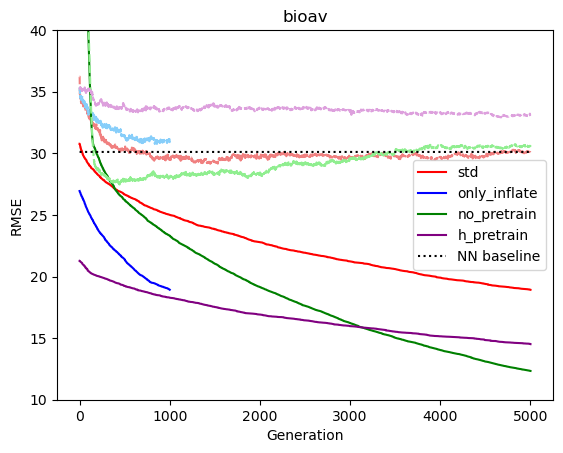

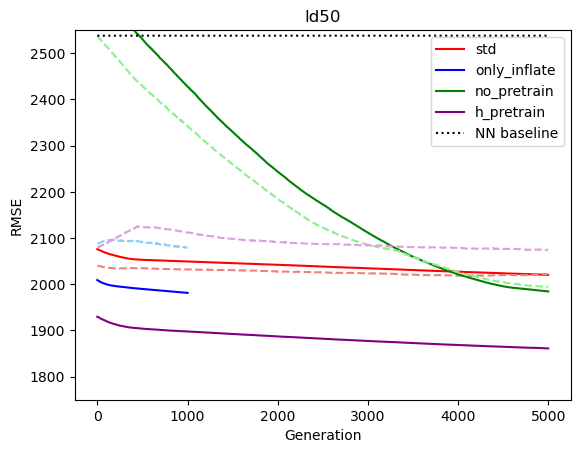

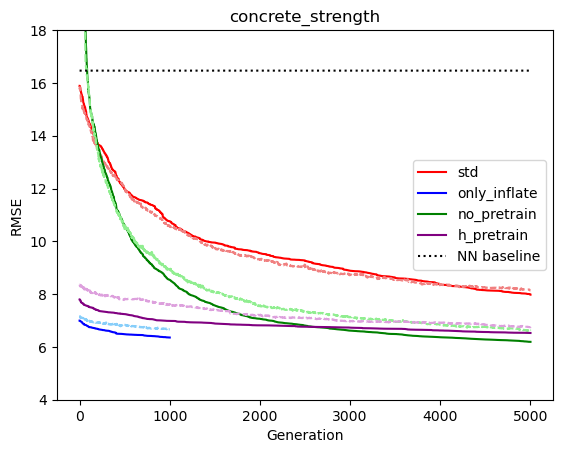

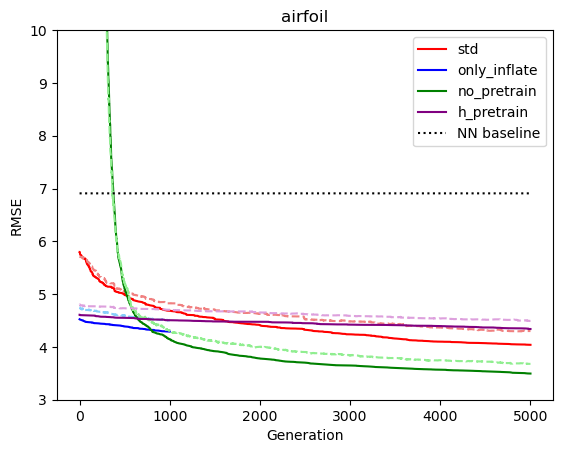

In [10]:
for dataset in datas:
    for i, var in enumerate(variants):
        
        grouped = data[(data['dataset'] == dataset) &
                       (data['variant'] == var)][
                        ['train_fitness', 'test_fitness', 'generation']].groupby('generation').median()
        
        plt.plot(grouped.index, grouped.train_fitness, label = var, color = colors[i])
        plt.plot(grouped.index, grouped.test_fitness, color = light_colors[i], linestyle = 'dashed') # label = 'test',


    baseline = baseline_final[baseline_final.dataset == dataset][['test_fitness', 'epoch']].groupby('epoch').median().values[0]
    
    plt.plot([i for i in range(5000)], [baseline for _ in range(5000)], color = 'black', linestyle = 'dotted', label = 'NN baseline')

    plt.ylim(limits[dataset])

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

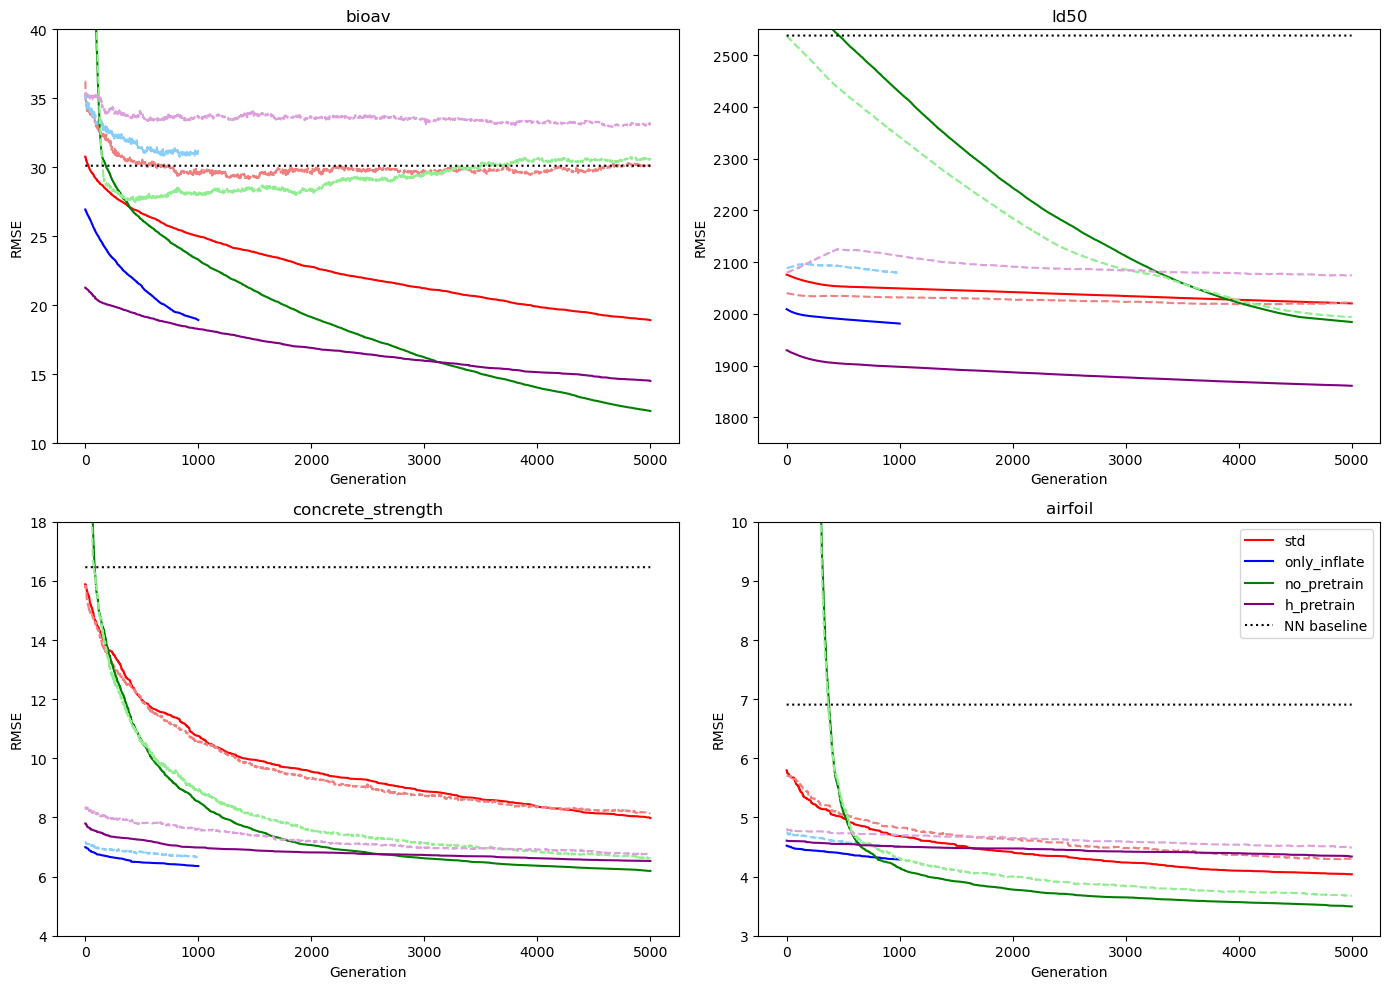

In [14]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  # Flatten to access axes with a single index

for idx, dataset in enumerate(datas):
    ax = axes[idx]  # Current subplot axis

    for i, var in enumerate(variants):
        grouped = data[(data['dataset'] == dataset) & 
                       (data['variant'] == var)][
                       ['train_fitness', 'test_fitness', 'generation']
                     ].groupby('generation').median()
        
        ax.plot(grouped.index, grouped.train_fitness, label=var, color=colors[i])
        ax.plot(grouped.index, grouped.test_fitness, color=light_colors[i], linestyle='dashed')

    baseline = baseline_final[baseline_final.dataset == dataset][['test_fitness', 'epoch']].groupby('epoch').median().values[0]
    ax.plot(range(5000), [baseline]*5000, color='black', linestyle='dotted', label='NN baseline')

    ax.set_ylim(limits[dataset])
    ax.set_title(dataset)
    ax.set_xlabel('Generation')
    ax.set_ylabel('RMSE')
ax.legend()

plt.tight_layout()
plt.show()


% This file was created with matplot2tikz v0.3.2.
\begin{tikzpicture}

\definecolor{darkgray176}{RGB}{176,176,176}
\definecolor{green}{RGB}{0,128,0}
\definecolor{lightcoral}{RGB}{240,128,128}
\definecolor{lightgray204}{RGB}{204,204,204}
\definecolor{lightgreen}{RGB}{144,238,144}
\definecolor{lightskyblue}{RGB}{135,206,250}
\definecolor{plum}{RGB}{221,160,221}
\definecolor{purple}{RGB}{128,0,128}

\begin{groupplot}[group style={group size=2 by 2}]
\nextgroupplot[
tick align=outside,
tick pos=left,
title={bioav},
x grid style={darkgray176},
xlabel={Generation},
xmin=-250, xmax=5250,
xtick style={color=black},
y grid style={darkgray176},
ylabel={RMSE},
ymin=10, ymax=40,
ytick style={color=black}
]
\addplot [semithick, red]
table {%
0 30.7764854431152
100 29.1160669326782
200 28.277322769165
300 27.6243858337402
400 27.086353302002
500 26.6545524597168
600 26.313268661499
700 25.8746814727783
800 25.5471754074097
900 25.245512008667
1000 25.0138053894043
1100 24.7638902664185
1200 24.50688

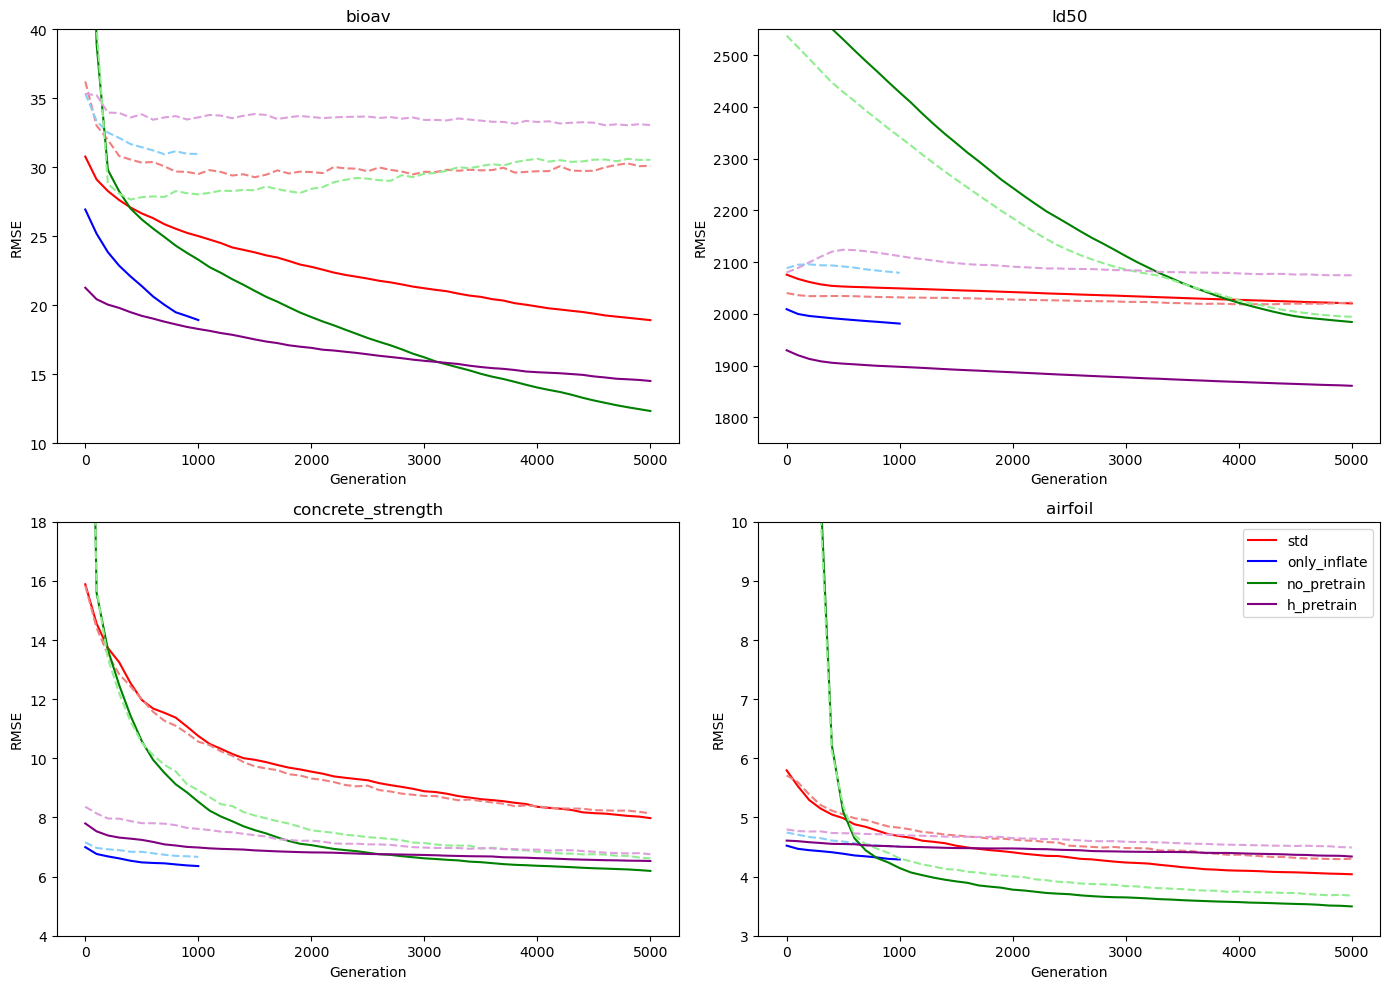

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  # Flatten to access axes with a single index

for idx, dataset in enumerate(datas):
    ax = axes[idx]  # Current subplot axis

    for i, var in enumerate(variants):
        grouped = data[(data['dataset'] == dataset) & 
                       (data['variant'] == var)][
                       ['train_fitness', 'test_fitness', 'generation']
                     ].groupby('generation').median()
        grouped = grouped.query("generation%100 == 0")
        
        ax.plot(grouped.index, grouped.train_fitness, label=var, color=colors[i])
        ax.plot(grouped.index, grouped.test_fitness, color=light_colors[i], linestyle='dashed')

    # baseline = baseline_final[baseline_final.dataset == dataset][['test_fitness', 'epoch']].groupby('epoch').median().values[0]
    # ax.plot(range(5000), [baseline]*5000, color='black', linestyle='dotted', label='NN baseline')

    ax.set_ylim(limits[dataset])
    ax.set_title(dataset)
    ax.set_xlabel('Generation')
    ax.set_ylabel('RMSE')
ax.legend()

plt.tight_layout()
# plt.show()
print(matplot2tikz.get_tikz_code())

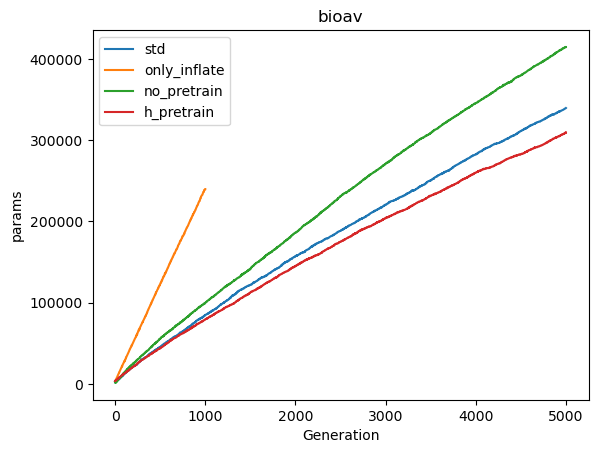

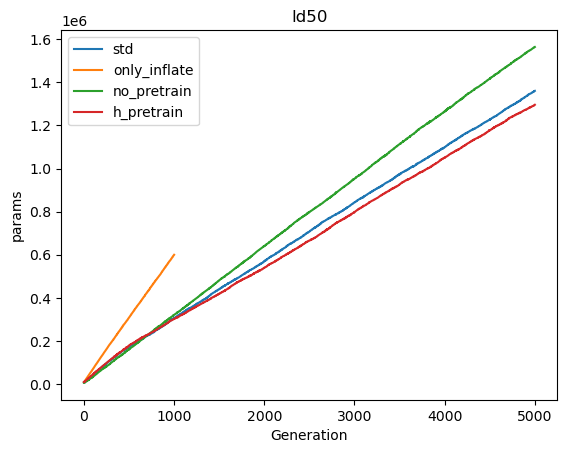

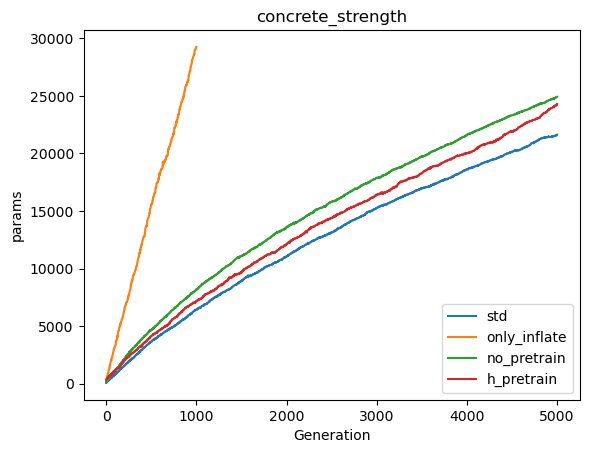

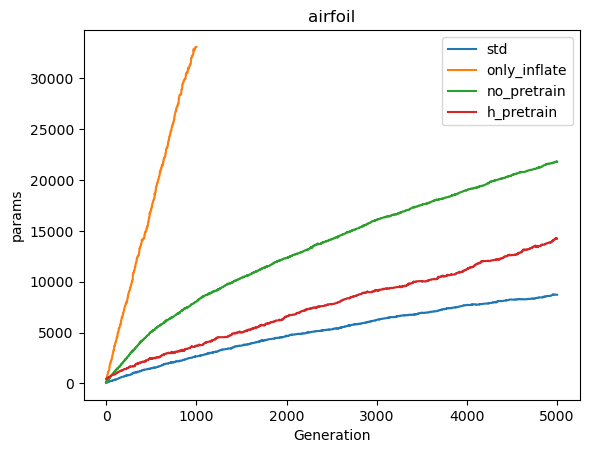

In [13]:
for dataset in datas:
    for i, var in enumerate(variants):
        
        grouped = data[(data['dataset'] == dataset) &
                       (data['variant'] == var)][
                        ['parameters', 'generation']].groupby('generation').median()
        
        plt.plot(grouped.index, grouped.parameters, label = var)
    

    # plt.ylim(limits[dataset])

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('params')
    plt.legend()
    plt.show()

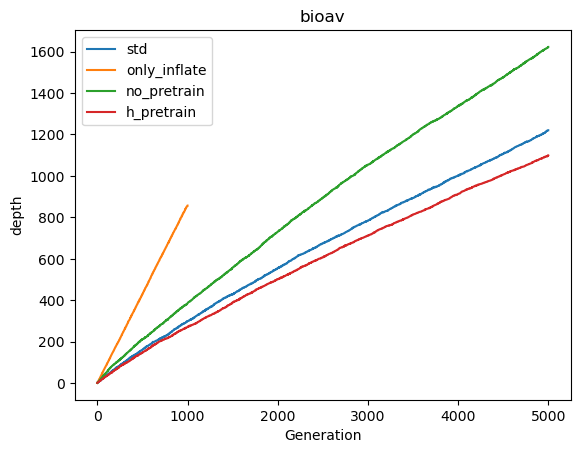

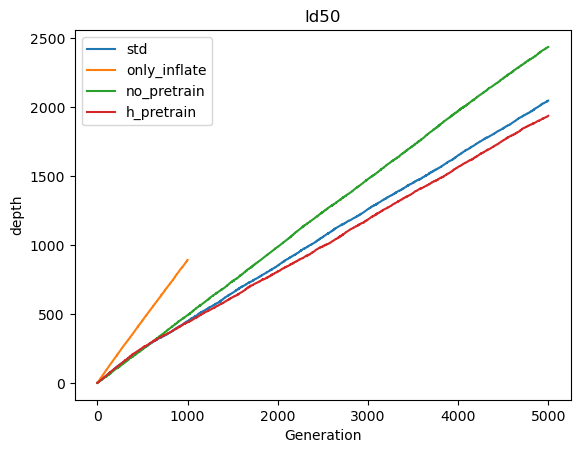

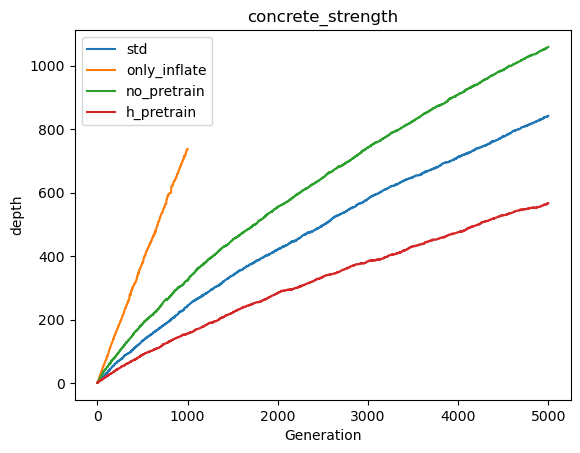

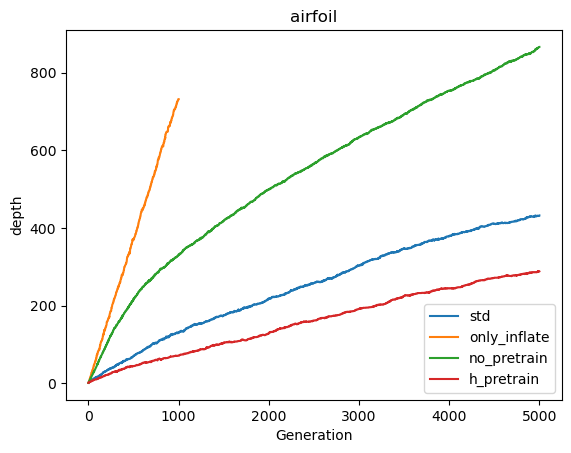

In [14]:
for dataset in datas:
    for i, var in enumerate(variants):
        
        grouped = data[(data['dataset'] == dataset) &
                       (data['variant'] == var)][
                        ['depth', 'generation']].groupby('generation').median()
        
        plt.plot(grouped.index, grouped.depth, label = var)
    

    # plt.ylim(limits[dataset])

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('depth')
    plt.legend()
    plt.show()

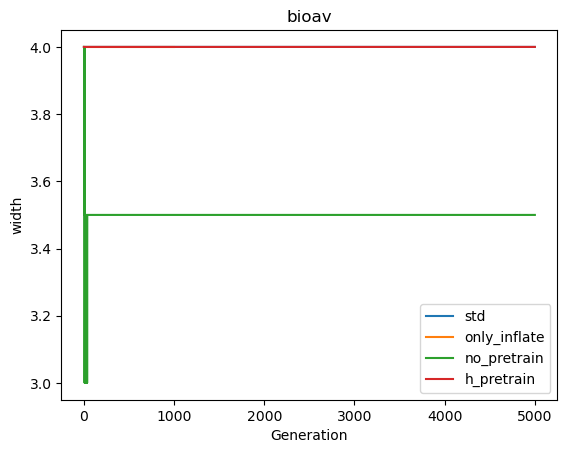

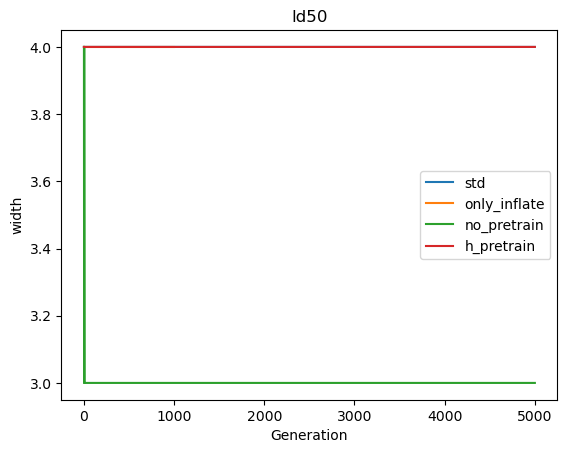

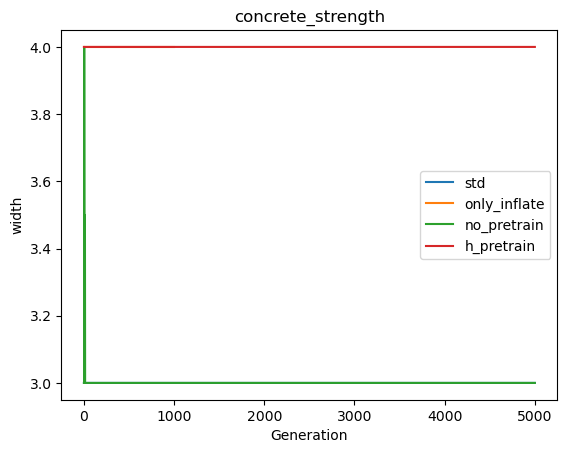

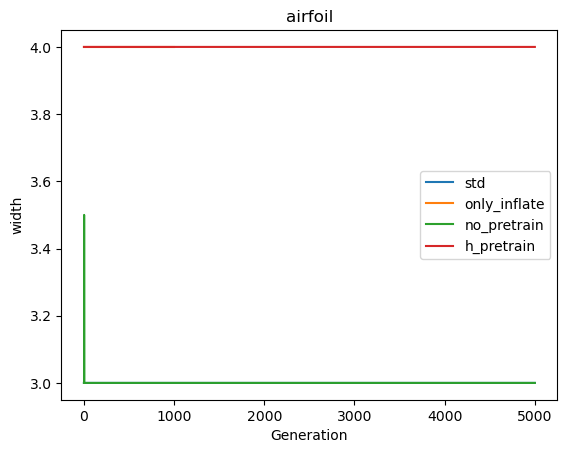

In [15]:
for dataset in datas:
    for i, var in enumerate(variants):
        
        grouped = data[(data['dataset'] == dataset) &
                       (data['variant'] == var)][
                        ['width', 'generation']].groupby('generation').median()
        
        plt.plot(grouped.index, grouped.width, label = var)
    

    # plt.ylim(limits[dataset])

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('width')
    plt.legend()
    plt.show()

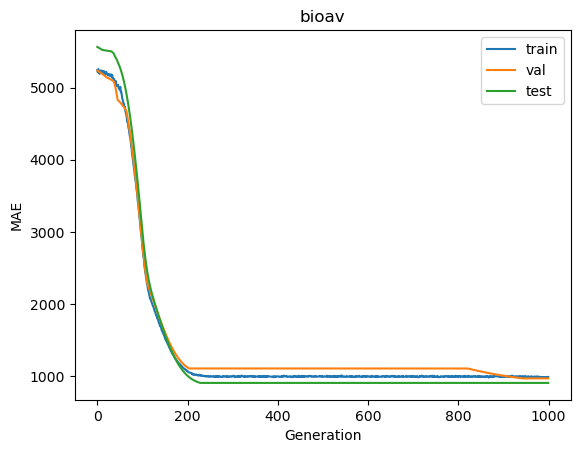

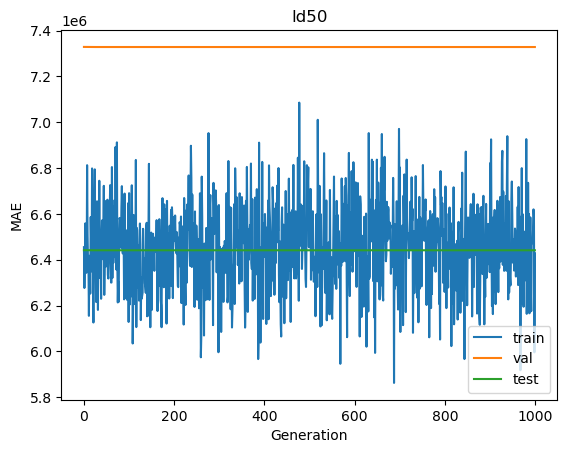

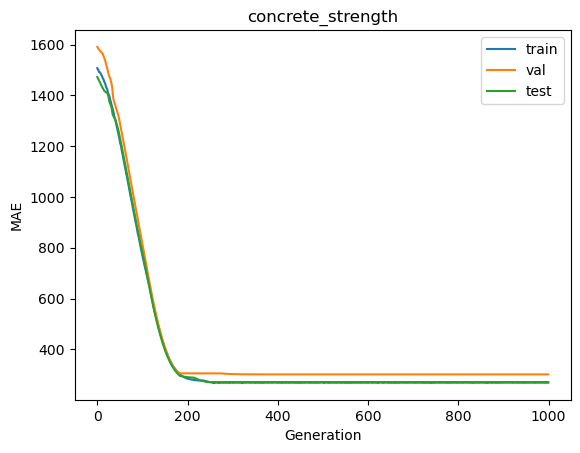

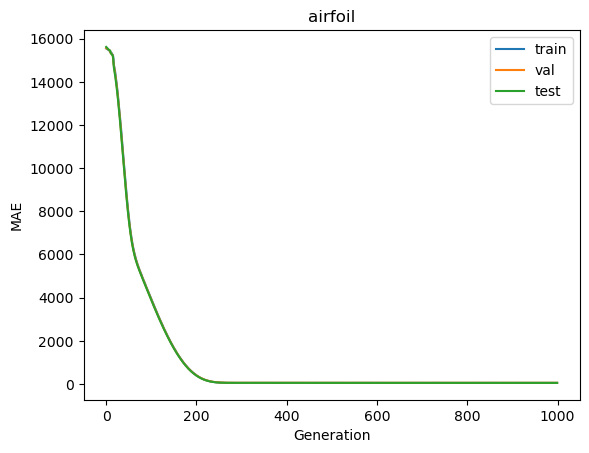

In [16]:
for dataset in datas:
        
    grouped = baseline_evo[(baseline_evo['dataset'] == dataset)][
                    ['train_fitness', 'val_fitness', 'test_fitness', 'epoch']].groupby('epoch').median()
    
    plt.plot(grouped.index, grouped.train_fitness, label = 'train')
    plt.plot(grouped.index, grouped.val_fitness, label = 'val') # label = 'test',
    plt.plot(grouped.index, grouped.test_fitness, label = 'test')


    # baseline = baseline_final[baseline_final.dataset == dataset][['test_fitness', 'epoch']].groupby('epoch').median().values[0]
    
    # plt.plot([i for i in range(5000)], [baseline for _ in range(5000)], color = 'black', linestyle = 'dotted', label = 'NN baseline')

    plt.title(dataset)
    plt.xlabel('Generation')
    plt.ylabel('MAE')
    plt.legend()
    plt.show()